## IMPORTING THE LIBRARIES

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## DATA LOADING

In [50]:
df = pd.read_csv("C:/Users/nanda/OneDrive/Desktop/Mini Project/CO2 Emission.csv")

In [51]:
df.head()

,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,primary_energy_consumption
0,Afghanistan,1991,2.427,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10,13.651
1,Afghanistan,1992,1.379,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10,8.961
2,Afghanistan,1993,1.333,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09,8.935
3,Afghanistan,1994,1.282,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09,8.617
4,Afghanistan,1995,1.230,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10,7.246


In [52]:
df.tail()

,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,primary_energy_consumption
6586,Zimbabwe,2016,10.738,6.959,0.639,3.139,3.139,11.92,14030338.0,2.096179e+10,4.750000e+01
6587,Zimbabwe,2017,9.582,5.665,0.678,3.239,3.239,14236599.00,14236599.0,2.194784e+10,2.194784e+10
6588,Zimbabwe,2018,11.854,7.101,0.697,4.056,4.056,14438812.00,14438812.0,2.271535e+10,2.271535e+10
6589,Zimbabwe,2019,10.949,6.020,0.697,4.232,4.232,14645473.00,14645473.0,1.464547e+07,1.464547e+07
6590,Zimbabwe,2020,10.531,6.257,0.697,3.576,3.576,14862927.00,14862927.0,1.486293e+07,1.486293e+07


## EDA

In [53]:
df.shape

(6591, 11)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     6591 non-null   object 
 1   year                        6591 non-null   int64  
 2   co2                         6591 non-null   float64
 3   coal_co2                    6591 non-null   float64
 4   cement_co2                  6591 non-null   float64
 5   gas_co2                     6591 non-null   float64
 6   oil_co2                     6591 non-null   float64
 7   methane                     6591 non-null   float64
 8   population                  6591 non-null   float64
 9   gdp                         6591 non-null   float64
 10  primary_energy_consumption  6591 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 566.5+ KB


In [55]:
df.describe()

,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,primary_energy_consumption
count,6591.000000,6.591000e+03,6.591000e+03,6.591000e+03,6.591000e+03,6.591000e+03,6.591000e+03,6.591000e+03,6.591000e+03,6.591000e+03
mean,2005.549992,1.601861e+04,1.594054e+04,1.589117e+04,1.591271e+04,1.593155e+04,5.000675e+06,3.017421e+07,3.183922e+11,2.502471e+09
std,8.650693,2.353946e+05,2.353993e+05,2.354023e+05,2.354009e+05,2.353997e+05,5.169968e+07,1.228245e+08,1.281518e+12,2.414385e+10
min,1991.000000,4.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-03,0.000000e+00,2.028000e+00,0.000000e+00,0.000000e+00
25%,1998.000000,8.340000e-01,1.540000e-01,1.910000e-01,4.080000e-01,6.890000e-01,3.750000e+00,6.163640e+05,1.305781e+06,1.001350e+01
50%,2006.000000,6.607000e+00,6.490000e-01,6.000000e-01,2.187000e+00,3.693000e+00,1.850000e+01,5.395253e+06,2.158979e+10,1.027490e+02
75%,2013.000000,5.438250e+01,6.925000e+00,2.236000e+00,1.226550e+01,2.381050e+01,9.161100e+02,1.920936e+07,1.422591e+11,1.294404e+03
max,2020.000000,3.670308e+06,3.670308e+06,3.670308e+06,3.670308e+06,3.670308e+06,1.439324e+09,1.439324e+09,1.815162e+13,1.060806e+12


## DATA CLEANING

In [56]:
#checking the NULL Values
df.isnull().sum()

country                       0
year                          0
co2                           0
coal_co2                      0
cement_co2                    0
gas_co2                       0
oil_co2                       0
methane                       0
population                    0
gdp                           0
primary_energy_consumption    0
dtype: int64

## OUTLIERS

Outliers in 'co2' column:
      country  year      co2  coal_co2  cement_co2  gas_co2  oil_co2  \
83    Algeria  2014  142.529     0.546       7.668   73.833   52.886   
84    Algeria  2015  149.683     0.502       8.062   78.769   55.590   
85    Algeria  2016  148.929     9.356       9.356   78.677   54.627   
86    Algeria  2017  154.936     0.795      10.710   82.352   55.308   
87    Algeria  2018  161.487     1.330      10.749   88.887   54.922   
...       ...   ...      ...       ...         ...      ...      ...   
6476  Vietnam  2016  192.766    81.561      36.822   20.368   54.015   
6477  Vietnam  2017  195.249    77.680      42.735   17.877   56.957   
6478  Vietnam  2018  223.718    94.927      49.637   18.554   60.599   
6479  Vietnam  2019  260.312   124.026      52.855   18.925   64.506   
6480  Vietnam  2020  254.303   126.085      53.038   16.735   58.445   

          methane  population           gdp  primary_energy_consumption  
83          49.29  38923688.0  5.31

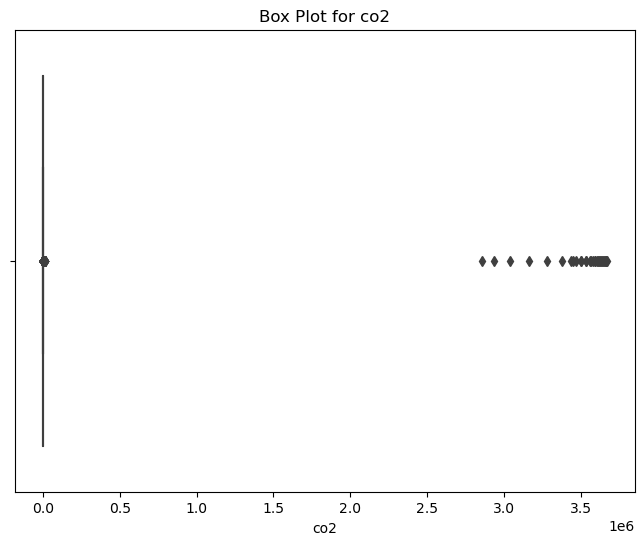

In [57]:
import pandas as pd

# Assuming 'df' is your DataFrame
column_name = 'co2'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Display outliers
print("Outliers in 'co2' column:")
print(outliers)

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column_name])
plt.title(f'Box Plot for {column_name}')
plt.show()

In [58]:
# Finding the outliers percentage
def detect_outliers(data, target_column):
    outlier_percent = {}
    
    if data[target_column].dtype != object:
        q1 = np.quantile(data[target_column], 0.25)
        q3 = np.quantile(data[target_column], 0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        outliers = data[(data[target_column] > upper_bound) | (data[target_column] < lower_bound)][target_column]
        outlier_percentage = len(outliers) / len(data[target_column]) * 100
        outlier_percent[target_column] = outlier_percentage
    
    return pd.DataFrame(data=outlier_percent.values(), index=outlier_percent.keys(), columns=['Outlier_percentage'])

# Assuming 'df' is your DataFrame
co2_outliers = detect_outliers(df, 'co2')
print(co2_outliers)

     Outlier_percentage
co2            14.86876


## CORRELATION

C:\Users\nanda\AppData\Local\Temp\ipykernel_10596\4172012060.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


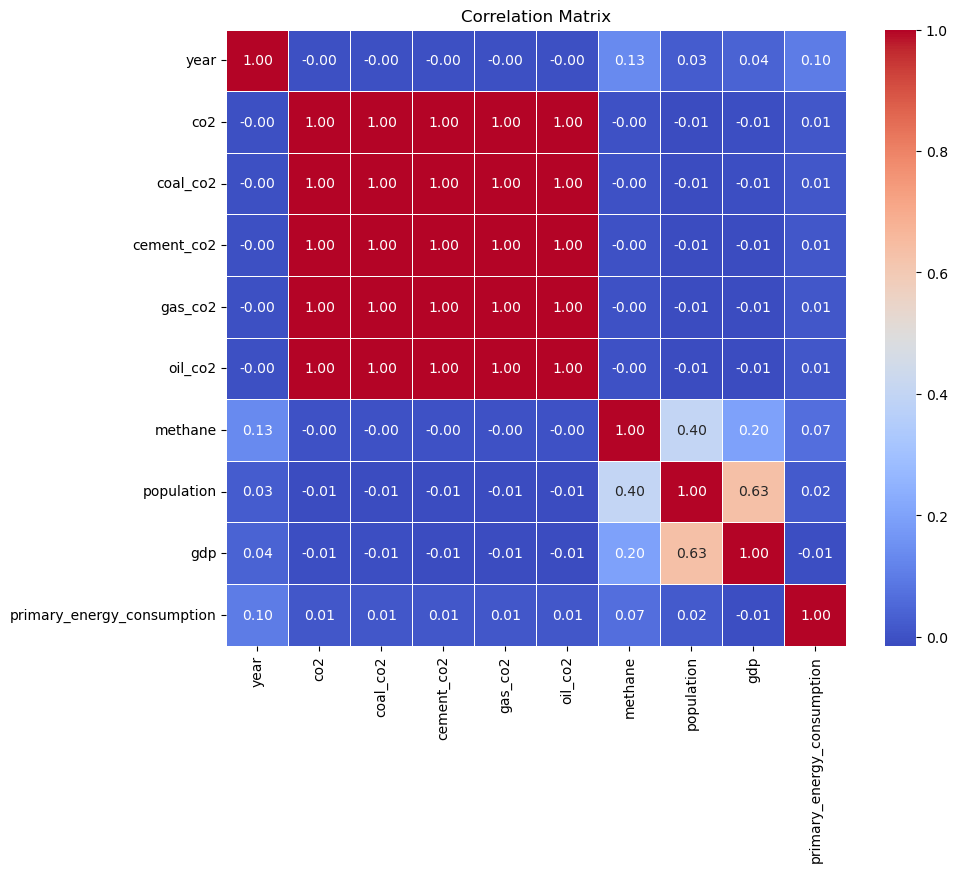

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## FEATURES AND TARGET VARIABLE

In [90]:
# Define features and target variable
X = df.drop(['co2'], axis=1)
y = df['co2']

In [91]:
X

,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,primary_energy_consumption
0,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10,1.365100e+01
1,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10,8.961000e+00
2,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09,8.935000e+00
3,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09,8.617000e+00
4,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10,7.246000e+00
...,...,...,...,...,...,...,...,...
6586,6.959,0.639,3.139,3.139,11.92,14030338.0,2.096179e+10,4.750000e+01
6587,5.665,0.678,3.239,3.239,14236599.00,14236599.0,2.194784e+10,2.194784e+10
6588,7.101,0.697,4.056,4.056,14438812.00,14438812.0,2.271535e+10,2.271535e+10
6589,6.020,0.697,4.232,4.232,14645473.00,14645473.0,1.464547e+07,1.464547e+07


## SPLITTING THE DATA INTO TRAIN AND TEST 

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
numerical_columns = ['coal_co2', 'cement_co2', 'gas_co2', 'oil_co2', 'primary_energy_consumption']

# Select only the numerical columns
X_train_numeric = X_train[numerical_columns]
X_test_numeric = X_test[numerical_columns]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [94]:
X

,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,primary_energy_consumption
0,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10,1.365100e+01
1,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10,8.961000e+00
2,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09,8.935000e+00
3,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09,8.617000e+00
4,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10,7.246000e+00
...,...,...,...,...,...,...,...,...
6586,6.959,0.639,3.139,3.139,11.92,14030338.0,2.096179e+10,4.750000e+01
6587,5.665,0.678,3.239,3.239,14236599.00,14236599.0,2.194784e+10,2.194784e+10
6588,7.101,0.697,4.056,4.056,14438812.00,14438812.0,2.271535e+10,2.271535e+10
6589,6.020,0.697,4.232,4.232,14645473.00,14645473.0,1.464547e+07,1.464547e+07


In [95]:
y

0        2.427
1        1.379
2        1.333
3        1.282
4        1.230
         ...  
6586    10.738
6587     9.582
6588    11.854
6589    10.949
6590    10.531
Name: co2, Length: 6591, dtype: float64

## MODEL  BUILDING

In [96]:
# Initialize and train the KNN model
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [97]:
# Choose the number of neighbors (k)
k = 5

## PREDICTIONS

In [98]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

## EVALUATING THE MODEL

In [99]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 92628050.72053774


In [100]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')

R2 Score: 0.9974


In [101]:
# Load the sample data
sample_data = pd.read_csv(r"C:\Users\nanda\OneDrive\Desktop\Mini Project\sample_data.csv")

In [102]:
# Assuming your model expects features X and target y
X_sample = sample_data[['coal_co2', 'cement_co2', 'gas_co2', 'oil_co2', 'methane', 'population', 'gdp', 'primary_energy_consumption']]
y_sample = sample_data['co2']

In [105]:
X_sample

,coal_co2,cement_co2,gas_co2,oil_co2,methane
0,300.2,100.0,400.3,500.0,30.5
1,310.0,110.5,410.2,499.5,32.0
2,320.5,120.2,420.0,505.8,33.5
3,330.0,130.1,430.2,510.2,35.0
4,340.2,140.0,440.5,515.5,36.5
5,350.0,150.5,450.8,520.0,38.0
6,360.5,160.2,460.0,525.5,39.5
7,370.0,170.1,470.2,530.2,41.0
8,380.2,180.0,480.5,535.8,42.5
9,390.0,190.5,490.8,540.5,44.0


In [106]:
y_pred_sample = model.predict(X_sample)

C:\Users\nanda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [107]:
# Assuming your model was trained with these features
features_used_in_training = ['coal_co2', 'cement_co2', 'gas_co2', 'oil_co2', 'methane']

# Select only the features used in training
X_sample = sample_data[features_used_in_training]

# Make predictions
y_pred_sample = model.predict(X_sample)


C:\Users\nanda\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [108]:
from sklearn.metrics import r2_score

r2_sample = r2_score(y_sample, y_pred_sample)
print(f'R^2 Score on Sample Data: {r2_sample:.4f}')


R^2 Score on Sample Data: -2352699768.7827


## PCA

In [109]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [110]:
# Assuming 'df' is your DataFrame
X = df.drop('co2', axis=1)  # Exclude the target variable if present
y = df['co2']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [112]:
# Choose the number of components (you can adjust this based on your needs)
n_components = 2

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_standardized)


In [113]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)


Explained Variance: [0.50009588 0.23128164]


In [121]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Target'] = y  # Add the target variable if needed

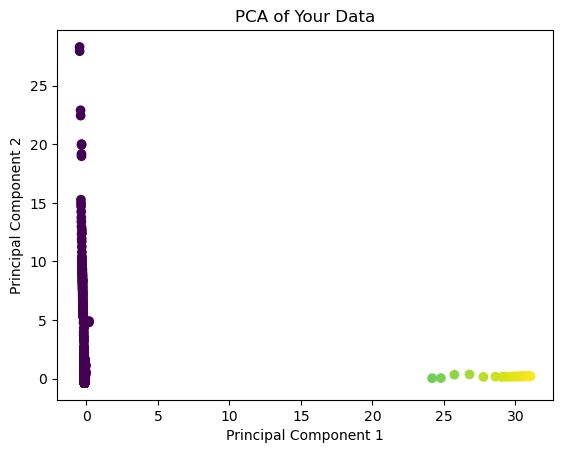

In [118]:
import matplotlib.pyplot as plt

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Your Data')
plt.show()


In [119]:
print(pca_df)


           PC1       PC2  Target
0    -0.131739 -0.284039   2.427
1    -0.131861 -0.277372   1.379
2    -0.131969 -0.271548   1.333
3    -0.132076 -0.265677   1.282
4    -0.132211 -0.258075   1.230
...        ...       ...     ...
6586 -0.131855 -0.275958  10.738
6587 -0.125363 -0.107680   9.582
6588 -0.125135 -0.103004  11.854
6589 -0.132653 -0.153723  10.949
6590 -0.132690 -0.150644  10.531

[6591 rows x 3 columns]


In [120]:
pca_df


,PC1,PC2,Target
0,-0.131739,-0.284039,2.427
1,-0.131861,-0.277372,1.379
2,-0.131969,-0.271548,1.333
3,-0.132076,-0.265677,1.282
4,-0.132211,-0.258075,1.230
...,...,...,...
6586,-0.131855,-0.275958,10.738
6587,-0.125363,-0.107680,9.582
6588,-0.125135,-0.103004,11.854
6589,-0.132653,-0.153723,10.949


In [123]:
X_reduced = pca.transform(X_standardized)